In [0]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

In [0]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import random

def poly_model(datas,actuals):
  a = PolynomialFeatures(2)
  
  #print(a.fit_transform(datas).astype(int))
  modelo = make_pipeline(a, LinearRegression())
  modelo.fit(datas, actuals)
  
  predicts = modelo.predict(datas)
  return (predicts,modelo)

def plot_model(datas,actuals,predicts):
  fig = pyplot.figure()
  ax = Axes3D(fig)
  #XT = datas.transpose()
  x_vals = datas[0]
  y_vals = datas[1]
  z_vals = actuals
  ax.scatter(x_vals, y_vals, z_vals, color='red')
  ax.scatter(x_vals, y_vals, predicts, color='blue')
  
  
def f_x12_x21(x):
  #print(x[0],x[1])
  return (x[0]**2+10*x[1] ) * np.random.randint(70,130, size=1)[0] / 100

def gen_data(x,func):
  func_applied = np.apply_along_axis(func, 1, x)
  return func_applied

def calculate_mse(actuals,predicts):
  mse = sum((actuals-predicts)**2) / len(actuals)
  return mse

class TestStats:
  pass

def poly_regression(data,actuals):
  
  (predictions,model) = poly_model(data,actuals)
  
  stats = TestStats()
  stats.data = data
  stats.actuals = actuals
  stats.predictions = predictions
  stats.model = model
  calculate_stats(stats)
  return stats

def calculate_stats(stats):
  stats.mse = calculate_mse(stats.actuals,stats.predictions)
  stats.r2_score = r2_score(stats.actuals,stats.predictions)
  stats.mean_squared_error = mean_squared_error(stats.actuals,stats.predictions)
  stats.coeffs= np.array([ "{0:.2f}".format(  xi ) for xi in stats.model.steps[1][1].coef_])
  
  
def dump_stats(stats): 
  print("r2_score",stats.r2_score)
  print("mean_squared_error",stats.mean_squared_error)  
  print("coeffs",stats.coeffs)  
  print("mse", stats.mse)
  
  
def plot_from_stats(stats):
  plot_model(stats.data.transpose(),stats.actuals.transpose(),stats.predictions)
  

def generate_data(batch):  
  data = np.column_stack((np.linspace(0, 100, num=batch),np.linspace(0, 10, num=batch)))
  actuals = gen_data(data,f_x12_x21)
  return (data,actuals)


10
10
r2_score 0.9875829937377588
mean_squared_error 211375.5821232671
coeffs ['0.00' '-28.36' '-2.84' '1.48' '0.15' '0.01']
mse 211375.5821232671


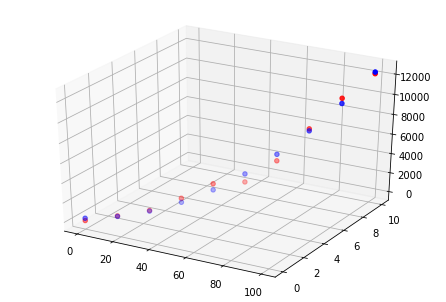

In [0]:

(data10,actuals10) = generate_data(10)

stats_poly = poly_regression(data10,actuals10) 
dump_stats(stats_poly)
plot_from_stats(stats_poly)

r2_score 0.9602584595030739
mean_squared_error 439688.40580269904
coeffs ['0.00' '-11.04' '-1.10' '1.17' '0.12' '0.01']
mse 439688.40580269886


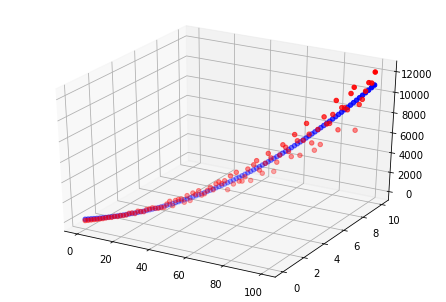

In [0]:


(data100,actuals100) = generate_data(100)

stats_poly100 = poly_regression(data100,actuals100) 
dump_stats(stats_poly100)
plot_from_stats(stats_poly100)

r2_score 0.9383773448209355
mean_squared_error 588431.0117674812
coeffs ['0.00' '0.97' '0.10' '0.98' '0.10' '0.01']
mse 588431.0117674811


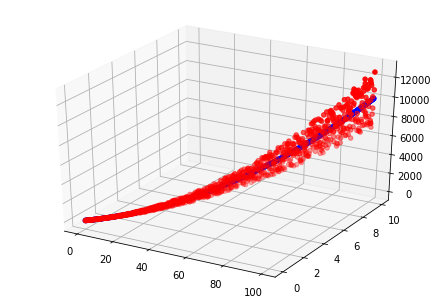

In [0]:
(data1000,actuals1000) = generate_data(1000)

stats_poly1000 = poly_regression(data1000,actuals1000) 
dump_stats(stats_poly1000)
plot_from_stats(stats_poly1000)